In [1]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 12.4 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=a692e9d463d4654bee868db14c2f85509d1506999f8f7e49325c09ac82f027dd
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [2]:
! signate list
! signate files --competition-id=492
! signate download --competition-id=492

  competitionId  title                                                                  closing     prize            submitters
---------------  ---------------------------------------------------------------------  ----------  -------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                   -                                  5160
             24  【練習問題】お弁当の需要予測                                           -                                  6333
             27  【練習問題】Jリーグの観客動員数予測                                    -                                  1433
            100  【練習問題】手書き文字認識                                             -           Knowledge               170
            102  【練習問題】タイタニックの生存予測                                     -           Knowledge              1059
            103  【練習問題】音楽ラベリング                                             -           Knowledge                61
            104  【練習問題】スパムメール分類                                     

In [3]:
# ディレクトリ内のデータの確認
%ls

adc.json                                       requirements.txt
category_names.csv                             sales_history.csv
item_categories.csv                            sample_data/
PBL01_h_exercise4_question.pdf                 sample_submission.csv
PBL01_i_exercise4_supplementary-documents.pdf  test.csv
PBL01_sample_code.ipynb


In [4]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#baseline

month_bining          0
id                    0
store_id              0
sales              3060
sales_before_12       0
sales_before_11       0
sales_before_10       0
sales_before_9        0
sales_before_8        0
sales_before_7        0
sales_before_6        0
sales_before_5        0
sales_before_4        0
sales_before_3        0
sales_before_2        0
category_id           0
category              0
category_detail       0
year                  0
month                 0
dtype: int64
month_bining       float64
id                 float64
store_id           float64
sales              float64
sales_before_12    float64
sales_before_11    float64
sales_before_10    float64
sales_before_9     float64
sales_before_8     float64
sales_before_7     float64
sales_before_6     float64
sales_before_5     float64
sales_before_4     float64
sales_before_3     float64
sales_before_2     float64
category_id          int64
category            object
category_detail     object
year                 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 31.8442
[20]	valid_0's l2: 31.2908
[30]	valid_0's l2: 31.0558
[40]	valid_0's l2: 30.9919
[50]	valid_0's l2: 30.9485
[60]	valid_0's l2: 30.9265
[70]	valid_0's l2: 30.8431
[80]	valid_0's l2: 30.8012
[90]	valid_0's l2: 30.8095
[100]	valid_0's l2: 30.8214
Did not meet early stopping. Best iteration is:
[81]	valid_0's l2: 30.7974
5.549538865017908


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 20.906
[20]	valid_0's l2: 20.2184
[30]	valid_0's l2: 19.9476
[40]	valid_0's l2: 19.8187
[50]	valid_0's l2: 19.7501
[60]	valid_0's l2: 19.7691
[70]	valid_0's l2: 19.7357
[80]	valid_0's l2: 19.7021
[90]	valid_0's l2: 19.703
[100]	valid_0's l2: 19.7364
Did not meet early stopping. Best iteration is:
[87]	valid_0's l2: 19.6992
4.438376427104485


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 30.1304
[20]	valid_0's l2: 29.1066
[30]	valid_0's l2: 28.7128
[40]	valid_0's l2: 28.6533
[50]	valid_0's l2: 28.9345
[60]	valid_0's l2: 29.0974
Early stopping, best iteration is:
[41]	valid_0's l2: 28.6267
5.350392106874934


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 13.526
[20]	valid_0's l2: 12.7641
[30]	valid_0's l2: 12.4284
[40]	valid_0's l2: 12.2206
[50]	valid_0's l2: 12.1404
[60]	valid_0's l2: 12.0997
[70]	valid_0's l2: 12.0771
[80]	valid_0's l2: 12.0669
[90]	valid_0's l2: 12.0687
[100]	valid_0's l2: 12.0447
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 12.0447
3.4705451197069737


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 12.2818
[20]	valid_0's l2: 11.717
[30]	valid_0's l2: 11.4475
[40]	valid_0's l2: 11.3227
[50]	valid_0's l2: 11.2575
[60]	valid_0's l2: 11.2172
[70]	valid_0's l2: 11.1891
[80]	valid_0's l2: 11.1333
[90]	valid_0's l2: 11.118
[100]	valid_0's l2: 11.1254
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 11.118
3.3343679017534082
4.428644084091542


'\nスコア：\n3.7783936\n'

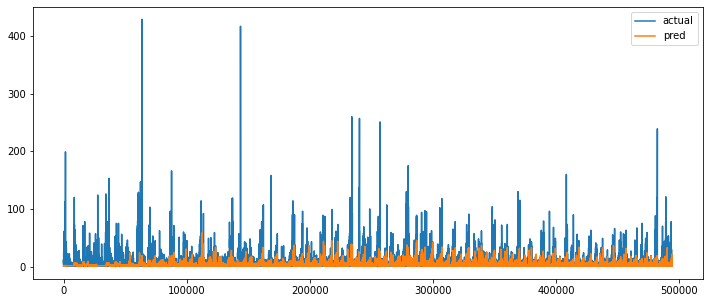

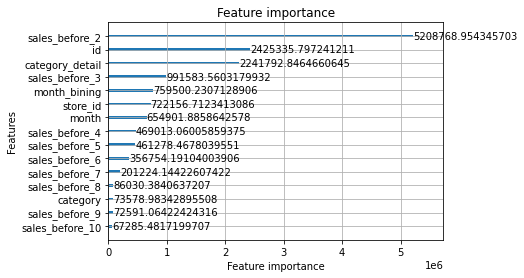

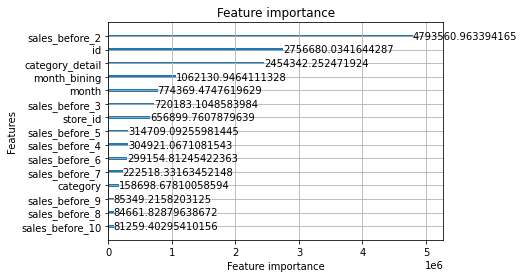

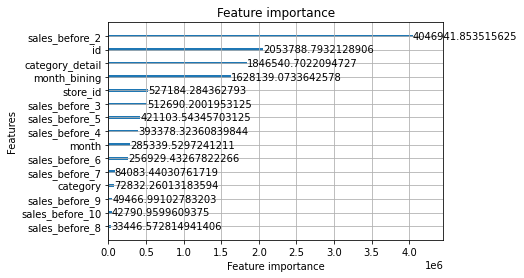

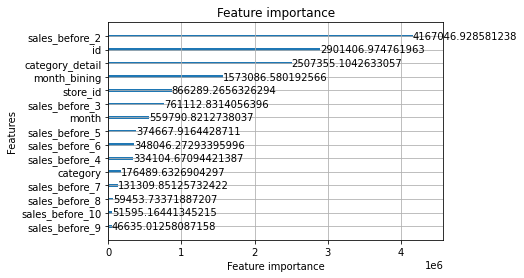

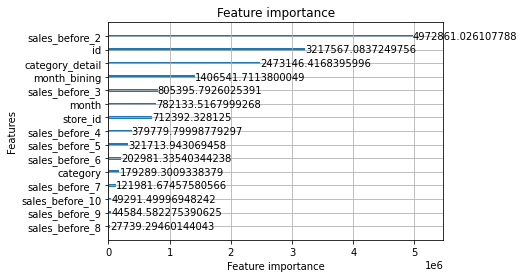

In [6]:
'''
初期設定
'''

DATA_PATH = '/content/drive/My Drive/AIQuest2021/PBL_01_需要予測/Phase2/demand/processed_data/processed_train_test_df.csv'
SAMPLESUB_PATH = 'sample_submission.csv'
SUB_PATH = '/content/drive/My Drive/AIQuest2021/PBL_01_需要予測/Phase2/demand/submit/demand_LightGBM_kfold.csv'

# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# データの読み込み
df = pd.read_csv(DATA_PATH)
print(df.isnull().sum())
print(df.dtypes)

# object型の変数の取得
categories = df.columns[df.dtypes == 'object']
print(categories)

# label Encoding
for cat in categories:
    le = LabelEncoder() 
    print(cat)
    
    df[cat].fillna('missing', inplace=True)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])
    # LabelEncoderは数値に変換するだけであるため、最後にastype('category')としておく
    df[cat] = df[cat].astype('category') 

# trainとtestに分割
train = df[~df['sales'].isnull()]
test = df[df['sales'].isnull()]

# 説明変数と目的変数を指定
X_train = train.drop('sales', axis=1)
Y_train = train['sales']
X_test = test.drop('sales', axis=1)

'''
モデルの構築と評価
'''

# ライブラリのインポート
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean

# 分割する
folds = 5
kf = KFold(n_splits=folds)

# ハイパーパラメータの設定
params = {
    'objective':'regression',
    'random_seed':1234    
}

# 各foldごとに作成したモデルごとの予測値を保存
models = []
rmses = []
oof = np.zeros(len(X_train))

for train_index, val_index in kf.split(X_train):
    x_train = X_train.iloc[train_index]
    x_valid = X_train.iloc[val_index]
    y_train = Y_train.iloc[train_index]
    y_valid = Y_train.iloc[val_index]
    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)    
    
    model = lgb.train(params,
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100, # 学習回数の実行回数
                      early_stopping_rounds=20, # early_stoppingの判定基準
                      verbose_eval=10)
    
    y_pred = model.predict(x_valid, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(rmse)
    
    models.append(model)
    rmses.append(rmse)
    oof[val_index] = y_pred

# 平均RMSEを計算する
print(mean(rmses))

# 現状の予測値と実際の値の違いを可視化
actual_pred_df = pd.DataFrame({
    'actual':Y_train,
    'pred': oof})

actual_pred_df.plot(figsize=(12,5))

# 特徴量重要度の表示
for model in models:
    lgb.plot_importance(model, importance_type='gain',
                        max_num_features=15)

"""
予測精度：
2.8227140054103583
"""

'''
テストデータの予測
'''

# テストデータにおける予測
preds = []


for model in models:
    pred = model.predict(X_test)
    preds.append(pred)

# predsの平均を計算
preds_array = np.array(preds)
pred = np.mean(preds_array, axis = 0)

'''
提出
'''

# 提出用サンプルの読み込み
sub = pd.read_csv(SAMPLESUB_PATH, header=None)

# カラム1の値を置き換え
sub[1] = pred

# CSVファイルの出力
sub.to_csv(SUB_PATH, header=None, index=False)

"""
スコア：
3.7783936
"""